# Data Analysis Sandbox

## Plotting Curves

In the old days, we used graphing calculators for some of this, and paper and pencil before that.

Those older tools still make sense to use in some contexts, but when you're going for some publication quality digital outputs, you'll want to do more homework.

---

Lets do some review from the top, now that we've toured a large territory.

Given this is a visualization course, lets talk about plotting right away.

Classic opening, like pawn to King-4 in chess.  We'll get the Queen out later (pandas).

#### By the Way... Lets Talk about Unicode!

# &#128120; &#9812; &#128060;

This way of representing Unicode characters in Markdown requires knowing the decimal equivalents.

In [1]:
# Testing Unicode.  Unicode includes many emoji

print('\U0001F478', '\U00002654', '\U0001F43C')  # does this work for you?

👸 ♔ 🐼


And now, for our opening moves...

In [2]:
% matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')  # <--- good idea, looks nicer
import numpy as np

In the beginning, one needs a "domain" to rule over, a turf.  We'll be using numpy to generate domains a lot, especially...

In [3]:
np.round(np.linspace(-1, 1, 11), 2) # say how many points

array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

In [4]:
np.round(np.arange(-1, 1.1, 0.2), 2) # give spread between the points

array([-1. , -0.8, -0.6, -0.4, -0.2, -0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

Here's a Castle, an Emoji.  Do you see it?

# &#127984;

Our ability to reach a "co-domain" another turf, depends on having some domain to feed to a callable.  The callable eats domain objects (picture fish) and does whatever work necessary to reach a corresponding result.

In [5]:
chr(127984)  # testing the chr function, see a Castle?

'🏰'

What can they teach me about parabolas in Cyberia?  Do we find them in nature?

* [Real Life Examples](https://sciencestruck.com/real-life-examples-of-parabola)
* [Lots in Gravity and Area Optimizing Problems](https://www.mathsisfun.com/algebra/quadratic-equation-real-world.html)

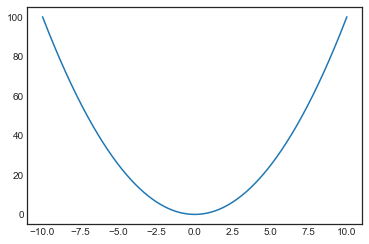

In [6]:
domain = np.linspace(-10, 10, 1000)  # a thousand points, evenly spaced
rule = lambda x: x**2
plt.plot(domain, np.vectorize(rule)(domain));

Look at how ```lambda``` was used to express a rule.  The object thereby created is a callable object, and we named it for later use.  If you had wanted to show everything in some step...

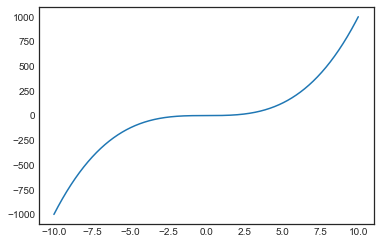

In [7]:
plt.plot(domain, np.vectorize(lambda x: x**3)(domain));

Remember what it means to ```np.vectorize```?  We're making a callable work with a numpy ndarray (an n-dimensional array) such that it applies to all elements in that array.

lets move on to pandas and look at functions in terms of columns, x and y.

In [8]:
import pandas as pd

In [9]:
parabola = pd.DataFrame({'x': domain,
                         'y': np.vectorize(lambda x: x**2)(domain)})

In [10]:
parabola.head()

,x,y
0,-10.00000,100.000000
1,-9.97998,99.600000
2,-9.95996,99.200802
3,-9.93994,98.802406
4,-9.91992,98.404811


OMG that was easy.  Might we do plotting directly from a DataFrame.  That might be too good to be true.

[Yes We Can!](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)

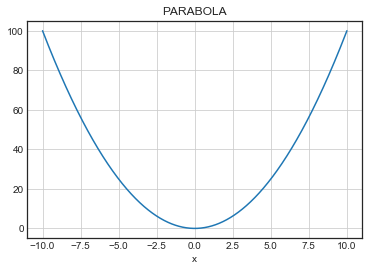

In [11]:
parabola.plot(x='x', y='y', kind='line', title="PARABOLA", grid=True, legend=False);

In [12]:
two_curves = pd.DataFrame({'x': domain,
                           'c0': np.vectorize(lambda x: x**2)(domain),
                           'c1': np.vectorize(lambda x: x**3)(domain)})

In [13]:
two_curves.head()

,x,c0,c1
0,-10.00000,100.000000,-1000.000000
1,-9.97998,99.600000,-994.006010
2,-9.95996,99.200802,-988.036020
3,-9.93994,98.802406,-982.089982
4,-9.91992,98.404811,-976.167847


We'll not use subplots at first.  Lets get both curves on the same grid.  If you don't turn subplots on, this will be the default behavior.  If you do turn subplots on, specify layout too, so that you get what you know you want.  See below.

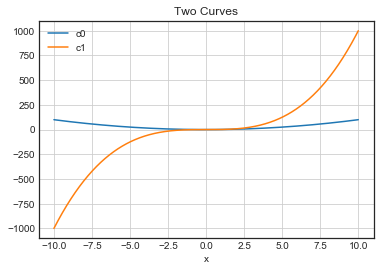

In [14]:
two_curves.plot(x='x', y=['c0', 'c1'], grid=True, title="Two Curves");

OK, now we're starting to get fancy.  The ```DataFrame.plot``` method will let you turn on subplots, specify their layout, and then access the subplots individually, by means of axes.

Note how layout=(2,1) says "give me two rows in a single column", and don't draw the x tickmarks both times, let them share.  The returned object is a numpy array of axes, organized the same way (in the same shape) as the subplots.

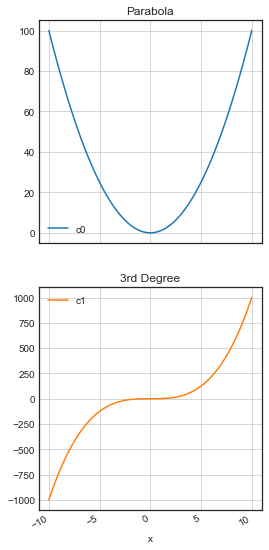

In [15]:
axes = two_curves.plot(x='x', y=['c0', 'c1'], layout=(2,1), 
                sharex=True, subplots=True, figsize=(4,10), grid=True)

axes[0,0].set_title('Parabola')
axes[1,0].set_title('3rd Degree');

* [A Guide to Subplots (VanderPlas)](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html)
* [Direct from the Docs](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)